In [4]:
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


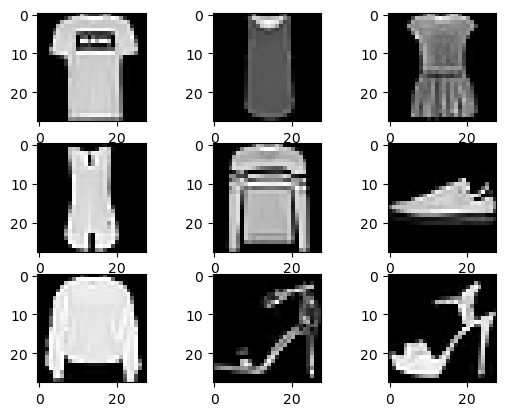

In [6]:
for i in range(1, 10):
	plt.subplot(3, 3, i)
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print(trainX.shape)

(60000, 28, 28, 1)


In [8]:
def model_arch():
	models = Sequential()	
	models.add(Conv2D(64, (5, 5),
					padding="same",
					activation="relu",
					input_shape=(28, 28, 1)))
	
	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(128, (5, 5), padding="same",
					activation="relu"))
	
	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(256, (5, 5), padding="same",
					activation="relu"))
	
	models.add(MaxPooling2D(pool_size=(2, 2)))
	
	models.add(Flatten())
	models.add(Dense(256, activation="relu"))
	
	models.add(Dense(10, activation="softmax"))
	return models

In [15]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
			loss='sparse_categorical_crossentropy',
			metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 256)       

In [10]:
history = model.fit(
	trainX.astype(np.float32), trainy.astype(np.float32),
	epochs=7,
	steps_per_epoch=150,
	validation_split=0.33
)

Epoch 1/7
150/150 [==============================] - 62s 408ms/step - loss: 2.0182 - sparse_categorical_accuracy: 0.7593 - val_loss: 0.4092 - val_sparse_categorical_accuracy: 0.8515
Epoch 2/7
150/150 [==============================] - 60s 402ms/step - loss: 0.3318 - sparse_categorical_accuracy: 0.8812 - val_loss: 0.3023 - val_sparse_categorical_accuracy: 0.8897
Epoch 3/7
150/150 [==============================] - 59s 393ms/step - loss: 0.2766 - sparse_categorical_accuracy: 0.8988 - val_loss: 0.2869 - val_sparse_categorical_accuracy: 0.8967
Epoch 4/7
150/150 [==============================] - 60s 399ms/step - loss: 0.2358 - sparse_categorical_accuracy: 0.9131 - val_loss: 0.2746 - val_sparse_categorical_accuracy: 0.9020
Epoch 5/7
150/150 [==============================] - 66s 443ms/step - loss: 0.2113 - sparse_categorical_accuracy: 0.9225 - val_loss: 0.2652 - val_sparse_categorical_accuracy: 0.9041
Epoch 6/7
150/150 [==============================] - 59s 397ms/step - loss: 0.1878 - spars

In [11]:
model.save_weights('./model.h5', overwrite=True)

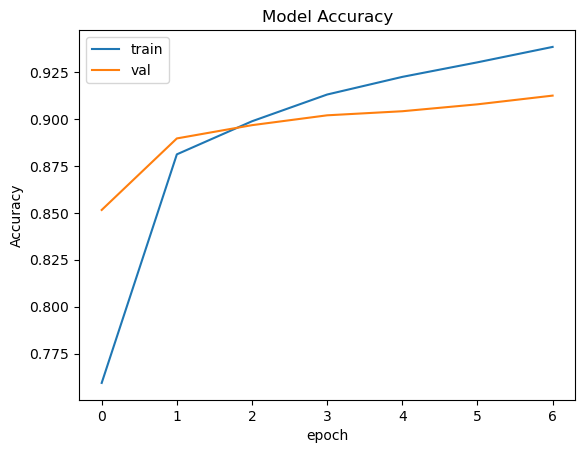

In [12]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

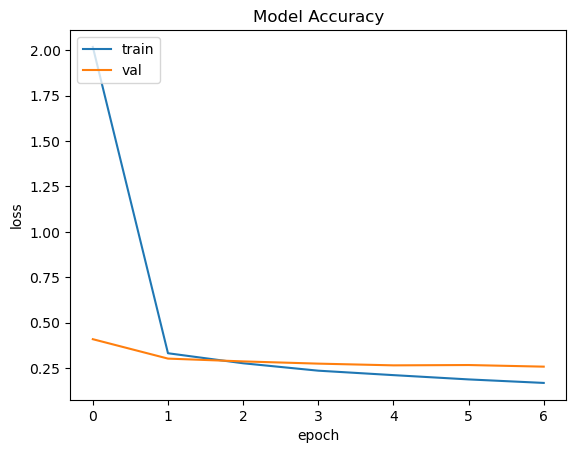

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 223ms/step
ankle_boots


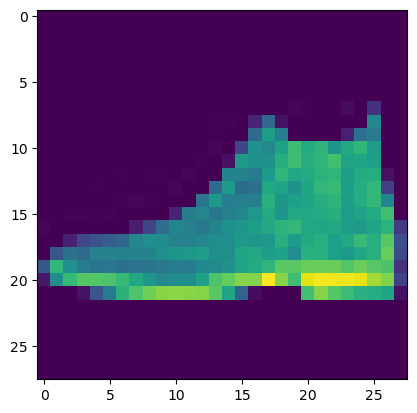

In [14]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
		'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

predictions = model.predict(testX[:1])
label = labels[np.argmax(predictions)]

print(label)
plt.imshow(testX[:1][0])
plt.show()